<a href="https://colab.research.google.com/github/prithviemmidi/Dissertation/blob/main/CIFAR10_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import datasets, models, layers
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

In [8]:
# Loading the CIFAR10 dataset

data = tf.keras.datasets.cifar10

In [9]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [10]:
# Normalising the data

train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
# Defining my optimisers

optimisers = {
    'MB-GD': SGD(learning_rate=0.01),   # MB-GD using SGD optimizer (batch_size = 100)
    'AdaGrad': Adagrad(learning_rate=0.01,  epsilon=1e-8),
    'AdaDelta': Adadelta(learning_rate=0.01, rho=0.9, epsilon=1e-8),
    'RMSprop': RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-8),
    'Adam': Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)}

histories = {}

In [12]:
for name, opt in optimisers.items():

    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy', # Minimising SCCE Loss Function
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=100)

    histories[name] = history

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1466 - loss: 2.2699 - val_accuracy: 0.2688 - val_loss: 2.0550
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2608 - loss: 2.0300 - val_accuracy: 0.3053 - val_loss: 1.9250
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3165 - loss: 1.9134 - val_accuracy: 0.3581 - val_loss: 1.8137
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3635 - loss: 1.7853 - val_accuracy: 0.4070 - val_loss: 1.6550
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4139 - loss: 1.6616 - val_accuracy: 0.4444 - val_loss: 1.5728
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4416 - loss: 1.5585 - val_accuracy: 0.4472 - val_loss: 1.5569
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4694 - loss: 1.4988 - val_accuracy: 0.4715 - val_loss: 1.4919
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4839 - loss: 1.4540 - val_accuracy: 0

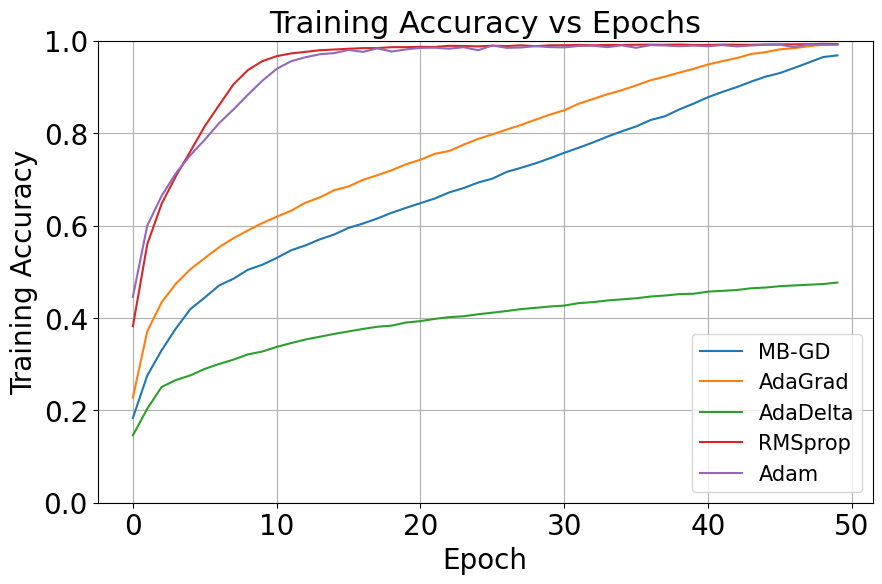

In [13]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Training Accuracy', fontsize=20)
plt.title('Training Accuracy vs Epochs', fontsize=22)
plt.legend(fontsize=15)
plt.ylim([0, 1])
plt.grid(True)
plt.tick_params(axis='both', labelsize=20)
plt.show()

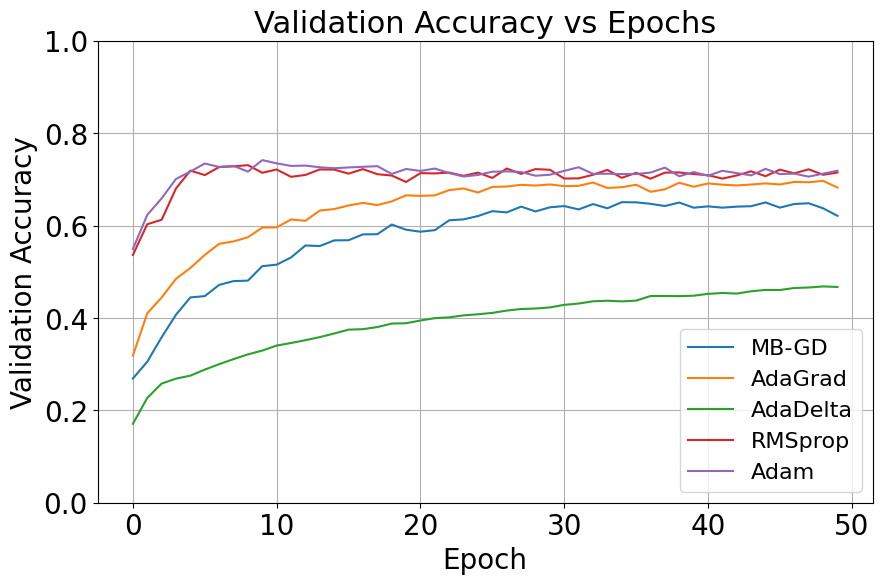

In [14]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Validation Accuracy', fontsize=20)
plt.title('Validation Accuracy vs Epochs', fontsize=22)
plt.legend(fontsize=16)
plt.ylim([0, 1])
plt.grid(True)
plt.tick_params(axis='both', labelsize=20)
plt.show()

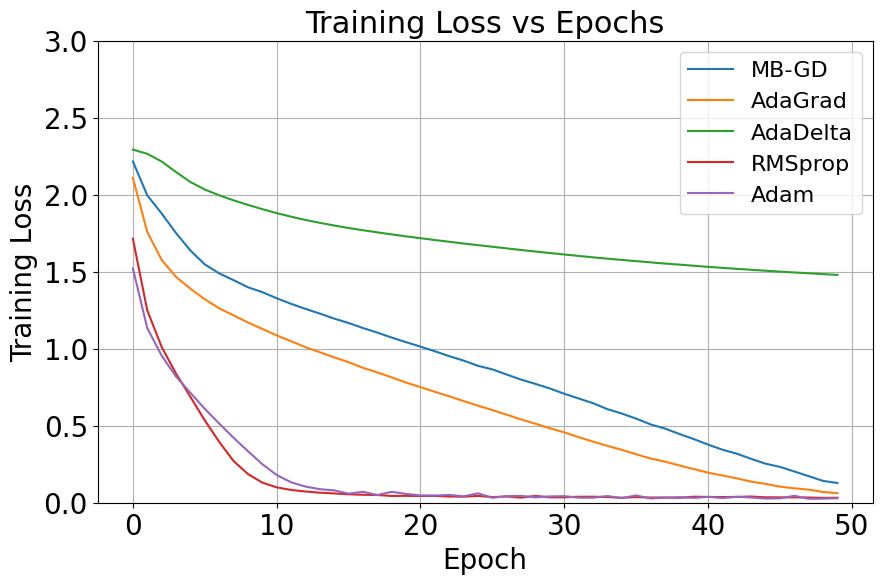

In [15]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Training Loss', fontsize=20)
plt.title('Training Loss vs Epochs', fontsize=22)
plt.ylim([0, 3])
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=20)
plt.show()

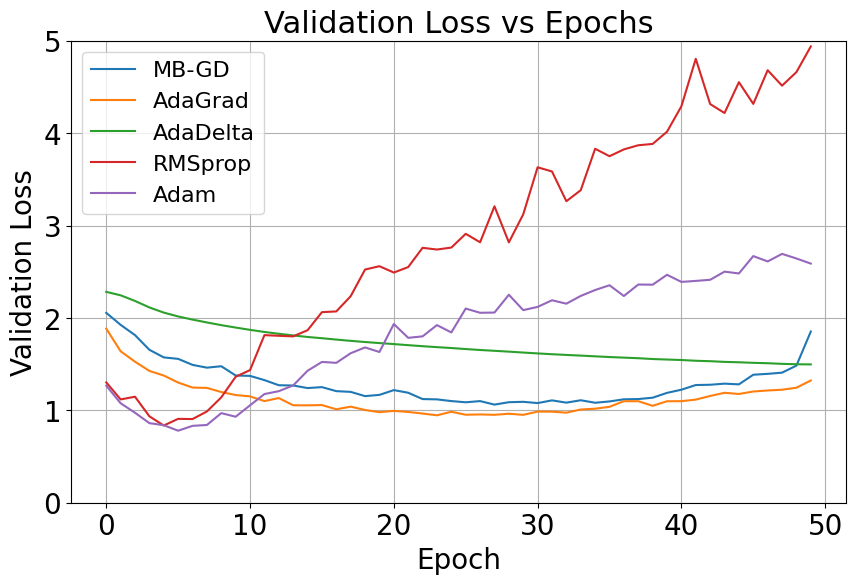

In [16]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.title('Validation Loss vs Epochs', fontsize=22)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=20)
plt.ylim([0, 5])
plt.show()

Text(0, 0.5, 'Training Accuracy')

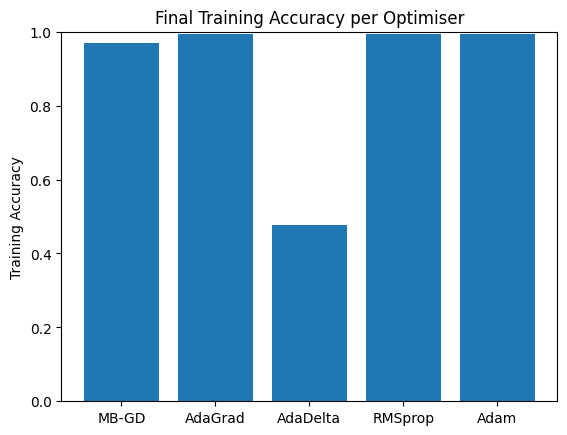

In [17]:
training_acc_bar = {name: max(history.history['accuracy']) for name, history in histories.items()}
plt.bar(training_acc_bar.keys(), training_acc_bar.values())
plt.title("Final Training Accuracy per Optimiser")
plt.ylim([0, 1])
plt.ylabel("Training Accuracy")

Text(0, 0.5, 'Validatioon Accuracy')

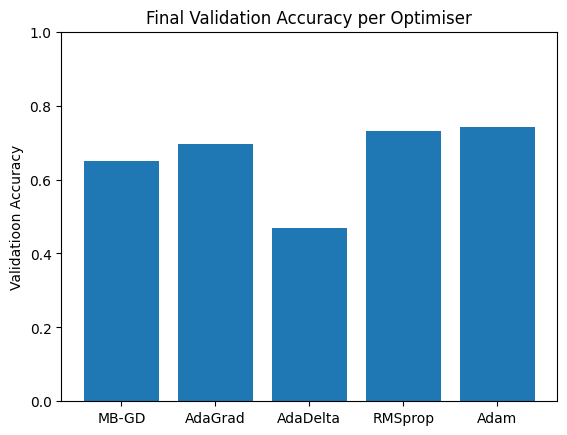

In [18]:
val_acc_bar = {name: max(history.history['val_accuracy']) for name, history in histories.items()}
plt.bar(val_acc_bar.keys(), val_acc_bar.values())
plt.title("Final Validation Accuracy per Optimiser")
plt.ylim([0, 1])
plt.ylabel("Validation Accuracy")

In [19]:
final_acc = {
    "Optimiser": [],
    "Final Training Accuracy": [],
    "Final Validation Accuracy": []}

for name, history in histories.items():
    final_acc["Optimiser"].append(name)
    final_acc["Final Training Accuracy"].append(history.history["accuracy"][-1])
    final_acc["Final Validation Accuracy"].append(history.history["val_accuracy"][-1])

df = pd.DataFrame(final_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Final Training Accuracy  Final Validation Accuracy
    MB-GD                   0.9683                     0.6210
  AdaGrad                   0.9925                     0.6822
 AdaDelta                   0.4766                     0.4670
  RMSprop                   0.9929                     0.7147
     Adam                   0.9912                     0.7186


In [20]:
final_loss = {
    "Optimiser": [],
    "Final Training Loss": [],
    "Final Validation Loss": []}

for name, history in histories.items():
    final_loss["Optimiser"].append(name)
    final_loss["Final Training Loss"].append(history.history["loss"][-1])
    final_loss["Final Validation Loss"].append(history.history["val_loss"][-1])

df = pd.DataFrame(final_loss)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Final Training Loss  Final Validation Loss
    MB-GD               0.1279                 1.8528
  AdaGrad               0.0624                 1.3228
 AdaDelta               1.4793                 1.4969
  RMSprop               0.0325                 4.9382
     Adam               0.0292                 2.5879


In [21]:
best_train_acc = {"Optimiser": [], "Best Training Accuracy": []}
for name, history in histories.items():
    best_train_acc["Optimiser"].append(name)
    best_train_acc["Best Training Accuracy"].append(max(history.history["accuracy"]))

df = pd.DataFrame(best_train_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Best Training Accuracy
    MB-GD                  0.9683
  AdaGrad                  0.9925
 AdaDelta                  0.4766
  RMSprop                  0.9932
     Adam                  0.9924


In [22]:
best_val_acc = {"Optimiser": [], "Best Validation Accuracy": []}
for name, history in histories.items():
    best_val_acc["Optimiser"].append(name)
    best_val_acc["Best Validation Accuracy"].append(max(history.history["val_accuracy"]))

df = pd.DataFrame(best_val_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Best Validation Accuracy
    MB-GD                    0.6505
  AdaGrad                    0.6967
 AdaDelta                    0.4682
  RMSprop                    0.7307
     Adam                    0.7416
